<a href="https://colab.research.google.com/github/c0b211598e/ProjExD/blob/main/%E5%8D%92%E6%A5%AD%E7%A0%94%E7%A9%B6%E3%83%A2%E3%83%87%E3%83%AB_CNN_Deeplearning_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [ ]:
standardized_df = pd.read_pickle('/content/drive/MyDrive/deep-orderbook-master/l2_snapshots/l2_snapshots_60s_2024-03_to_2024-06')

In [ ]:
standardized_df

,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,...,aq16,aq17,aq18,aq19,aq20,aq21,aq22,aq23,aq24,aq25
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-03-02 00:00:00,2.349420,2.356634,2.359753,2.365090,2.369223,2.372290,2.374749,2.376689,2.375039,2.376380,...,-0.481643,-0.590413,-0.045641,0.101911,-0.337582,0.117606,0.912176,0.097624,-0.565089,-0.591576
2024-03-02 00:01:00,2.628395,2.635565,2.638577,2.643855,2.641477,2.644503,2.646933,2.648846,2.650410,2.651730,...,-0.577280,-0.144690,-0.055908,0.101911,-0.488143,-0.593829,-0.726574,-0.101450,0.299648,-0.588591
2024-03-02 00:02:00,2.232640,2.207439,2.217098,2.215984,2.220132,2.223220,2.225696,2.227651,2.229255,2.227367,...,-0.410801,-0.555317,0.050183,0.539960,0.657431,-0.597063,-0.720259,-0.599134,-0.259528,-0.310971
2024-03-02 00:03:00,2.148299,2.155545,2.165224,2.154396,2.145587,2.148686,2.151170,2.153132,2.151503,2.152860,...,0.046131,-0.716760,-0.302312,-0.282636,-0.488143,-0.597063,-0.726574,-0.232092,-0.082303,0.032323
2024-03-02 00:04:00,2.307249,2.304740,2.314362,2.319710,2.323848,2.326921,2.316424,2.315130,2.313486,2.314831,...,1.268158,-0.590413,0.987890,-0.734061,-0.550332,-0.493582,-0.259262,0.050966,-0.439809,-0.436348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-30 23:55:00,1.918522,1.920952,1.924482,1.919918,1.921661,1.922374,1.921211,1.921642,1.922823,1.919649,...,-0.831557,0.128666,-0.859545,0.742961,-0.877799,1.722494,-0.144780,0.236347,1.085277,-0.045299
2024-06-30 23:56:00,1.918522,1.920097,1.916782,1.919062,1.915670,1.917238,1.918643,1.919930,1.917686,1.917081,...,0.710609,1.709714,-0.606873,1.146536,0.259784,-0.872811,1.815915,3.424879,-0.874765,-0.459835
2024-06-30 23:57:00,1.813392,1.814930,1.816693,1.818949,1.820673,1.821370,1.820196,1.820619,1.821794,1.822895,...,0.347418,-0.347048,-0.044475,-0.518546,-0.414829,-0.551610,-0.144780,-0.699912,-0.841783,-0.183478


In [ ]:
l2_snapshot_ = standardized_df[['b1','b2','b3','b4','b5','b6','b7','b8', 'b9', 'b10', 'a1','a2','a3','a4','a5','a6','a7','a8', 'a9', 'a10', 'bq1','bq2','bq3','bq4','bq5','bq6','bq7','bq8', 'bq9', 'bq10', 'aq1','aq2','aq3','aq4','aq5','aq6','aq7','aq8', 'aq9', 'aq10']]

In [ ]:
def generate_features_labels(df,ask, bid,k=20, alpha = 10e-5):
    df_ = df.copy()
    df_['mid_price'] = (df_[ask].to_numpy()+df_[bid].to_numpy())/2
    df_['target'] = 1
    index = df_.columns.get_loc('mid_price')
    target_index = df_.columns.get_loc('target')
    shape = df_.shape[0]
    y = df_['target'].to_numpy()
    for i in tqdm(range(k,shape-k)):
        if i==k:
            m_b = np.mean(df_.iloc[(i-k):i, index].to_numpy())
            m_a = np.mean(df_.iloc[i+1:(i+k+1), index].to_numpy())
            val = df_.iloc[i-k,index]
            valB = df_.iloc[i+1, index]
        else:
            curr_val = df_.iloc[i-1,index]
            curr_valB = df_.iloc[i+k, index]
            m_b = (m_b*k+(curr_val)-(val))/k
            m_a = (m_a*k+(curr_valB - valB))/k
            val = df_.iloc[(i-k),index]
            valB = df_.iloc[(i+1), index]

        if (m_b > m_a*(1+alpha)):
            y[i] = 2
        if (m_b < m_a*(1-alpha)):
            y[i] = 0

    y = y[k:shape-k]
    X = df.iloc[k:shape-k,:].to_numpy()
    return X,y

In [ ]:
# GridSearch
min_ = float('inf')
minI = 0
for i in np.logspace(0,-8,10, endpoint = True):
    X,y = generate_features_labels(standardized_df, ask='a1', bid = 'b1', alpha=i)
    y_ = pd.Series(y)
    temp = y_.value_counts()
    a,b,c = temp[0], temp[1], temp[2]
    sum_ = a+b+c
    l2 = ((1/3-(a/sum_))*100)**2 + ((1/3-(b/sum_))*100)**2 + ((1/3-(c/sum_))*100)**2
    if l2 < min_:
        min_ = l2
        minI = i
    del X,y,temp

# 最終結果の保存
best_alpha = minI
print("Best alpha:", best_alpha)

100%|██████████| 174200/174200 [00:14<00:00, 12110.27it/s]

Best alpha: 0.1291549665014884


In [ ]:
temp = y_.value_counts()
print(temp)

2    87395
0    86801
1        4
Name: count, dtype: int64


In [ ]:
print(minI, min_)

0.1291549665014884 425.1747996307432


In [ ]:
X,y = generate_features_labels(l2_snapshot_, ask='a1', bid = 'b1', alpha=minI)

100%|██████████| 174200/174200 [00:14<00:00, 11890.49it/s]


In [ ]:
y = y.astype('int')

<Axes: ylabel='count'>

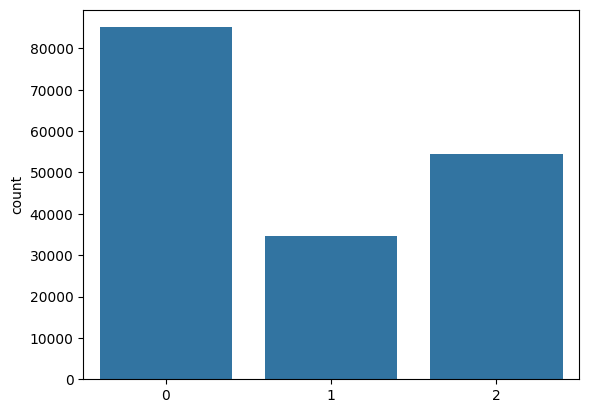

In [ ]:
sns.countplot(x = y)

In [ ]:
T = 100  #60s*T
D = 40
N = len(X) - T

In [ ]:
trainPart = int(len(X)*0.7)

In [ ]:
X_train = np.zeros((trainPart, T, D), dtype = 'float16')
y_train = np.zeros(trainPart, dtype = 'float16')

#Preparing the time series data using timestep of 100 and no of features = 200
for t in range(trainPart):
    X_train[t, :, :] = X[t:t+T]
    y_train[t] = y[t+T]


In [ ]:
print('X_train - Before: {} GB'.format(X_train.nbytes/1024**3), X_train.dtype)

X_train - Before: 0.9085163474082947 GB float16


In [ ]:
print('y_train - Before: {} GB'.format(y_train.nbytes/1024**3), y_train.dtype)

y_train - Before: 0.00022712908685207367 GB float16


In [ ]:
X_test = np.zeros((N - trainPart, T, D), dtype='float16')
y_test = np.zeros(N - trainPart, dtype='float16')

#Preparing the time series data using timestep of 100 and no of features = 40
for k in range(N - trainPart):
    t = k + trainPart
    X_test[k, :, :] = X[t:t+T]
    y_test[k] = y[t+T]

print('X_test - Before: {} GB'.format(X_test.nbytes/1024**3), X_test.dtype)
print('y_test - Before: {} GB'.format(y_test.nbytes/1024**3), y_test.dtype)

X_test - Before: 0.3886297345161438 GB float16
y_test - Before: 9.715743362903595e-05 GB float16


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
from tensorflow.keras.layers import Input, Conv1D, Conv2D, Flatten, MaxPooling1D, MaxPooling2D, Dense, LeakyReLU, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.compat.v1.keras.layers import CuDNNLSTM

In [ ]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [ ]:
i = Input(shape=X_train[0].shape)
x = Conv2D(16, (4,D), activation=LeakyReLU(alpha=0.01))(i)
x = tf.keras.layers.Reshape(target_shape=(T-3,16))(x)
x = Conv1D(16, 4, activation=LeakyReLU(alpha=0.01))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = MaxPooling1D(2)(x)
x = Conv1D(32, 3, activation=LeakyReLU(alpha=0.01))(x)
x = tf.keras.layers.BatchNormalization()(x)
x = MaxPooling1D(2)(x)
x = Bidirectional(CuDNNLSTM(64, return_sequences = False))(x)
x = Dense(32, activation=LeakyReLU(alpha=0.01))(x)
x = Dense(32, activation=LeakyReLU(alpha=0.01))(x)
x = Dense(3, activation='softmax')(x)

model = Model(i,x)

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100, 40, 1)]      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 1, 16)         2576      
                                                                 
 reshape_4 (Reshape)         (None, 97, 16)            0         
                                                                 
 conv1d_8 (Conv1D)           (None, 94, 16)            1040      
                                                                 
 batch_normalization_8 (Bat  (None, 94, 16)            64        
 chNormalization)                                                
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 47, 16)            0         
 g1D)                                                      

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, Reshape, Conv1D, BatchNormalization, MaxPooling1D, Bidirectional, LSTM, Dense



# データの形状を取得
input_shape = X_train[0].shape
T = input_shape[0]  # 時間ステップの数
D = input_shape[1]  # 特徴量の数
C = input_shape[2]  # チャネルの数

# TPU 構成
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)  # Use the non-experimental symbol
else:
    strategy = tf.distribute.get_strategy()  # default strategy that works on CPU and single GPU
print("REPLICAS: ", strategy.num_replicas_in_sync)

# モデルの定義
with strategy.scope():
    i = Input(shape=input_shape)
    x = Conv2D(16, (4, D), activation=LeakyReLU(alpha=0.01))(i)
    x = tf.keras.layers.Reshape(target_shape=(T-3, 16))(x)
    x = Conv1D(16, 4, activation=LeakyReLU(alpha=0.01))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = MaxPooling1D(2)(x)
    x = Conv1D(32, 2, activation=LeakyReLU(alpha=0.01))(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = MaxPooling1D(2)(x)
    x = Bidirectional(LSTM(64, return_sequences=False))(x)  # CuDNNLSTMをLSTMに変更
    x = Dense(32, activation=LeakyReLU(alpha=0.01))(x)
    x = Dense(32, activation=LeakyReLU(alpha=0.01))(x)
    x = Dense(3, activation='softmax')(x)

    model = Model(i, x)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# モデルの概要を表示
model.summary()

# トレーニング
EPOCHS = 4
BATCH_SIZE = 32

r = model.fit(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_split=0.2
)


Running on TPU  
REPLICAS:  8
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 100, 40, 1)]      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 1, 16)         2576      
                                                                 
 reshape_5 (Reshape)         (None, 97, 16)            0         
                                                                 
 conv1d_10 (Conv1D)          (None, 94, 16)            1040      
                                                                 
 batch_normalization_10 (Ba  (None, 94, 16)            64        
 tchNormalization)                                               
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 47, 16)            0         
 ng1D)                       

In [ ]:
print("X_train shape:", X_train.shape)

X_train shape: (121939, 100, 40, 1)


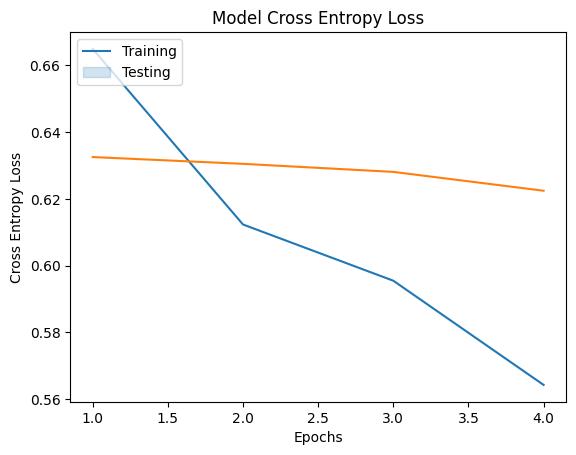

In [ ]:
sns.lineplot(x=range(1,EPOCHS+1),y=r.history['loss'])
sns.lineplot(x=range(1,EPOCHS+1),y=r.history['val_loss'])
plt.title('Model Cross Entropy Loss')
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Testing'], loc='upper left')

In [ ]:
y_pred = model.predict(X_test).argmax(axis=1)

1631/1631 [==============================] - 18s 10ms/step


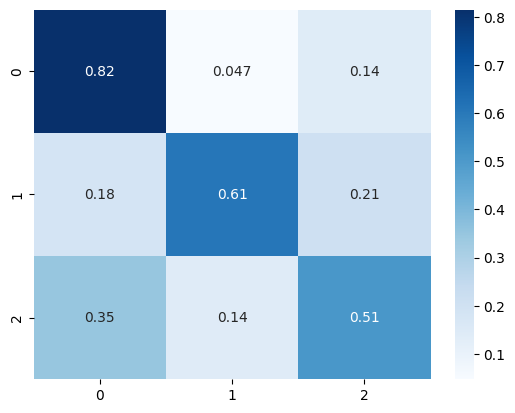

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred=y_pred, y_true=y_test)

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax=sns.heatmap(cm, annot=True, xticklabels=[0,1,2], yticklabels=[0,1,2], cmap='Blues')
ax.set_ylim(3.0, 0)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.82      0.77     26034
         1.0       0.59      0.61      0.60      8824
         2.0       0.62      0.51      0.56     17303

    accuracy                           0.68     52161
   macro avg       0.65      0.64      0.64     52161
weighted avg       0.67      0.68      0.67     52161



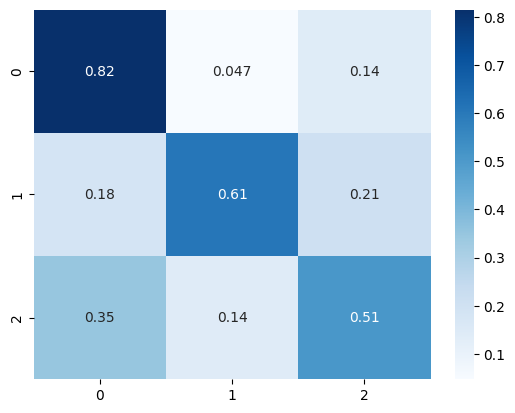

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred=y_pred, y_true=y_test)

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

ax=sns.heatmap(cm, annot=True, xticklabels=[0,1,2], yticklabels=[0,1,2], cmap='Blues')
ax.set_ylim(3.0, 0)
plt.show()